In [1]:
#Importing needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
%load_ext sql

In [2]:
#Configuring postgresql connection
postgre_path = "postgresql://<uid>:<pwd>@localhost:5432/sql-challenge"
engine = create_engine(postgre_path)

In [3]:
#Checking connection to confirm connectivity with ipython-sql package
%sql postgresql://<uid>:<pwd>@localhost:5432/sql-challenge

'Connected: postgres@sql-challenge'

In [4]:
#Getting employee salaries sql data into pandas dataframe and previewing data
sal_df = pd.read_sql_query('''Select * From salaries;''',engine)
sal_df.head()

,emp_no,salary
0,10001,60117.0
1,10002,65828.0
2,10003,40006.0
3,10004,40054.0
4,10005,78228.0


In [5]:
#Checking minimum salary of an employee
min(sal_df["salary"])

40000.0

In [6]:
#Checking maximum salary of an employee
max(sal_df["salary"])

129492.0

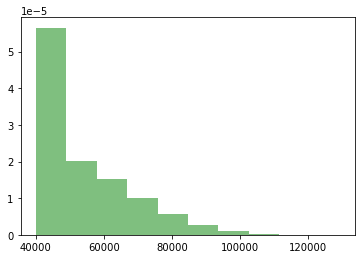

In [7]:
#Plotting Historgram of the Employees Salary with max of 10 Employee in a bin
plt.hist(sal_df["salary"], 10,
         density=True,
         histtype='bar',
         facecolor='g',
         alpha=0.5)

plt.show()

In [8]:
#Getting Avg Salary of the employees as per Title from sql and storing in Pandas Dataframe
sal_title_df = pd.read_sql_query('''
select 
	t.title
	,avg(s.salary) as avgsalary
from titles t
join employees e on e.emp_title_id = t.title_id
join salaries s on s.emp_no = e.emp_no
group by t.title;''',engine)

#Displaying result
sal_title_df

,title,avgsalary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


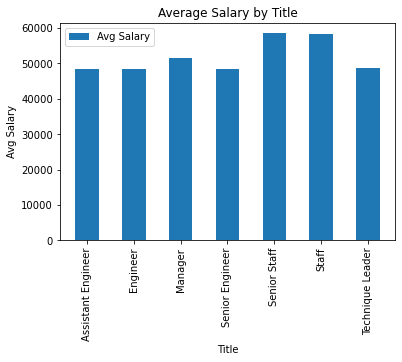

In [9]:
# Plotting a bar chart showing the avg salary as per title
plt.bar(sal_title_df["title"],sal_title_df["avgsalary"], label="Avg Salary", width=.50)

# Setting Chart display properties for better representation
plt.title("Average Salary by Title")
plt.xlabel("Title")
plt.ylabel("Avg Salary")
plt.xticks(rotation=90)
plt.legend()
plt.show()